# **Übergewicht und Fettleibigkeit bei Erwachsenen**

Gruppe: Soraya Gfrerer, Adriana Heeb, Selina Käch

## **1.1 Fragestellung**

- Welche 5 Länder/Regionen hatten zwischen den Jahren 1975 und 2016 die grösste Zunahme/Abnahme des Anteils an Übergewichtigen/Fettleibigen?
    - Welches Land weist die extremste Differenz im Anteil der Übergewichtigen auf und wie korreliert diese Differenz mit dem Bruttoinlandprodukt (BIP) des jeweiligen Landes?


## **1.2 Datenquellen**

- https://ourworldindata.org/grapher/share-of-adults-who-are-overweight?tab=chart
- https://ourworldindata.org/grapher/gdp-per-capita-maddison?tab=chart



## **1.3 Daten beschaffen und laden**

In [38]:
import pandas as pd
from matplotlib import pyplot as plt

##### **Datensatz 1 (Anteil an Übergewichtigen)**

In [39]:
df_Übergewichtige = pd.read_csv('share-of-adults-who-are-overweight.csv', skiprows=1,
                 names=['Gebiet','Code','Jahr','Anteil an Übergewichtigen']) 
df_Übergewichtige.head()  

,Gebiet,Code,Jahr,Anteil an Übergewichtigen
0,Afghanistan,AFG,1975,6.1
1,Afghanistan,AFG,1976,6.3
2,Afghanistan,AFG,1977,6.5
3,Afghanistan,AFG,1978,6.8
4,Afghanistan,AFG,1979,7.0


##### **Datensatz 2 (BIP)**

In [3]:
df_BIP = pd.read_csv('gdp-per-capita-maddison.csv', skiprows=1,
                 names=['Gebiet','Code','Jahr','BIP','Bemerkungen']) 
df_BIP.head()  

,Gebiet,Code,Jahr,BIP,Bemerkungen
0,Afghanistan,AFG,1950,1156.0,NaN
1,Afghanistan,AFG,1951,1170.0,NaN
2,Afghanistan,AFG,1952,1189.0,NaN
3,Afghanistan,AFG,1953,1240.0,NaN
4,Afghanistan,AFG,1954,1245.0,NaN


# **2. Daten vorbereiten**

##### **Datensatz 1 (Anteil an Übergewichtigen) vorbereiten**

In [4]:
df_pivot_allgemein = df_Übergewichtige.pivot_table(index='Gebiet', columns='Jahr', values='Anteil an Übergewichtigen')
print(df_pivot_allgemein)

Jahr                   1975  1976  1977  1978  1979  1980  1981  1982  1983  \
Gebiet                                                                        
Afghanistan             6.1   6.3   6.5   6.8   7.0   7.3   7.6   7.9   8.2   
Africa (WHO)           11.6  11.9  12.2  12.5  12.9  13.2  13.6  14.0  14.4   
Albania                33.3  33.8  34.2  34.7  35.1  35.6  36.1  36.5  37.0   
Algeria                30.0  30.6  31.2  31.9  32.6  33.3  34.0  34.8  35.6   
Americas (WHO)         36.6  37.2  37.8  38.5  39.1  39.7  40.4  41.0  41.7   
...                     ...   ...   ...   ...   ...   ...   ...   ...   ...   
Vietnam                 5.0   5.1   5.3   5.4   5.5   5.7   5.8   5.9   6.1   
Western Pacific (WHO)  11.1  11.3  11.6  11.9  12.2  12.5  12.8  13.1  13.5   
Yemen                  19.7  20.2  20.7  21.3  21.8  22.4  23.0  23.5  24.1   
Zambia                 11.8  12.3  12.7  13.1  13.6  14.1  14.5  14.9  15.3   
Zimbabwe               15.8  16.3  16.8  17.3  17.8 

In [5]:
df_pivot_allgemein = df_Übergewichtige.pivot_table(index='Gebiet', columns='Jahr', values='Anteil an Übergewichtigen')
df_pivot_allgemein.head() 

Jahr,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
Gebiet,,,,,,,,,,,,,,,,,,,,,
Afghanistan,6.1,6.3,6.5,6.8,7.0,7.3,7.6,7.9,8.2,8.4,...,17.7,18.2,18.8,19.3,19.9,20.5,21.1,21.7,22.3,23.0
Africa (WHO),11.6,11.9,12.2,12.5,12.9,13.2,13.6,14.0,14.4,14.8,...,26.1,26.7,27.2,27.8,28.3,28.9,29.4,30.0,30.5,31.1
Albania,33.3,33.8,34.2,34.7,35.1,35.6,36.1,36.5,37.0,37.5,...,51.0,51.8,52.5,53.3,54.0,54.8,55.5,56.3,57.0,57.7
Algeria,30.0,30.6,31.2,31.9,32.6,33.3,34.0,34.8,35.6,36.4,...,55.0,55.8,56.6,57.4,58.2,59.0,59.8,60.5,61.3,62.0
Americas (WHO),36.6,37.2,37.8,38.5,39.1,39.7,40.4,41.0,41.7,42.3,...,57.6,58.1,58.7,59.2,59.8,60.3,60.9,61.4,62.0,62.5


##### **Datensatz 2 (BIP) vorbereiten**

In [6]:
df_pivot_BIP = df_BIP.pivot_table(index='Gebiet', columns='Jahr', values='BIP')
print(df_pivot_BIP)

Jahr         1     730   1000  1090  1150  1252  1253  1254  1255  1256  ...  \
Gebiet                                                                   ...   
Afghanistan   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Albania       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Algeria       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Angola        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Argentina     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
...           ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
World         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Yemen         NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Yugoslavia    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Zambia        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
Zimbabwe      NaN   NaN   NaN   NaN   Na

In [7]:
df_pivot_BIP = df_BIP.pivot_table(index='Gebiet', columns='Jahr', values='BIP')
df_pivot_BIP.head()

Jahr,1,730,1000,1090,1150,1252,1253,1254,1255,1256,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
Gebiet,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2025.000,2022.000,1928.000,1931.2438,1909.7330,1888.8140,2031.7373,1928.4547,1485.547,1357.9878
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9748.728,9942.276,10192.529,10547.2550,10958.3070,11426.9200,11715.3070,11372.5410,12455.917,12978.1010
Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13508.265,13760.384,14007.894,14198.2720,14149.9150,14083.7720,14000.2790,13086.2930,13337.262,13506.4440
Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8463.942,8548.293,8319.567,7819.1475,7535.6123,7180.3555,6886.9540,6279.9290,6137.004,6118.9050
Argentina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19821.643,19112.232,19423.666,18819.6430,19150.5200,18460.8700,17912.6370,15975.8390,17470.682,18292.3180


##### **Merge von Datensatz 1 (Anteil von Übergewichtigen) mit Datensatz 2 (BIP)**

In [8]:
merged_df = pd.merge(df_Übergewichtige, df_BIP, on=['Gebiet', 'Jahr', 'Code'], how='inner')
print(merged_df)

           Gebiet Code  Jahr  Anteil an Übergewichtigen        BIP Bemerkungen
0     Afghanistan  AFG  1975                        6.1  1074.0000         NaN
1     Afghanistan  AFG  1976                        6.3  1105.0000         NaN
2     Afghanistan  AFG  1977                        6.5  1022.0000         NaN
3     Afghanistan  AFG  1978                        6.8  1070.0000         NaN
4     Afghanistan  AFG  1979                        7.0  1023.0000         NaN
...           ...  ...   ...                        ...        ...         ...
6660     Zimbabwe  ZWE  2012                       36.6  1749.8566         NaN
6661     Zimbabwe  ZWE  2013                       37.0  1766.3789         NaN
6662     Zimbabwe  ZWE  2014                       37.3  1789.0048         NaN
6663     Zimbabwe  ZWE  2015                       37.7  1798.7872         NaN
6664     Zimbabwe  ZWE  2016                       38.2  1782.8301         NaN

[6665 rows x 6 columns]


In [9]:
merged_df = pd.merge(df_Übergewichtige, df_BIP, on=['Gebiet', 'Jahr', 'Code'], how='inner')
merged_df.head()

,Gebiet,Code,Jahr,Anteil an Übergewichtigen,BIP,Bemerkungen
0,Afghanistan,AFG,1975,6.1,1074.0,NaN
1,Afghanistan,AFG,1976,6.3,1105.0,NaN
2,Afghanistan,AFG,1977,6.5,1022.0,NaN
3,Afghanistan,AFG,1978,6.8,1070.0,NaN
4,Afghanistan,AFG,1979,7.0,1023.0,NaN


# **3. Rohdaten Analyse (im Longformat)**

##### **Beobachtung:**
- Die Rohdaten beinhalten Länder, Regionen und Kontinente
- Die Spalte Gebiete enthält 197 verschiedene Gebiete
- Jedes Gebiet hat gleich viele Datenpunkte: 42
- Die Spalte Codes enthält 191 verschiedene Codes
- Es sind Daten zwischen den Jahren 1975 und 2016 vorhanden
- Der Anteil an Übergewichtigen streut zwischen 4.6 und 88.5 Prozent

In [28]:
df_Übergewichtige.dtypes

Gebiet                        object
Code                          object
Jahr                           int64
Anteil an Übergewichtigen    float64
dtype: object

## **3.1 Analyse Gebiete**

In [10]:
print('Anzahl verschiedener Gebiete: ', len(df_Übergewichtige['Gebiet'].unique()))

Anzahl verschiedener Gebiete:  197


In [11]:
df_Übergewichtige['Gebiet'].value_counts()

Gebiet
Afghanistan    42
Nepal          42
New Zealand    42
Nicaragua      42
Niger          42
               ..
Gambia         42
Georgia        42
Germany        42
Ghana          42
Zimbabwe       42
Name: count, Length: 197, dtype: int64

<Axes: title={'center': 'Anzahl Datenpunkte pro Gebiet'}, xlabel='Gebiet', ylabel='Anzahl Datenpunkte'>

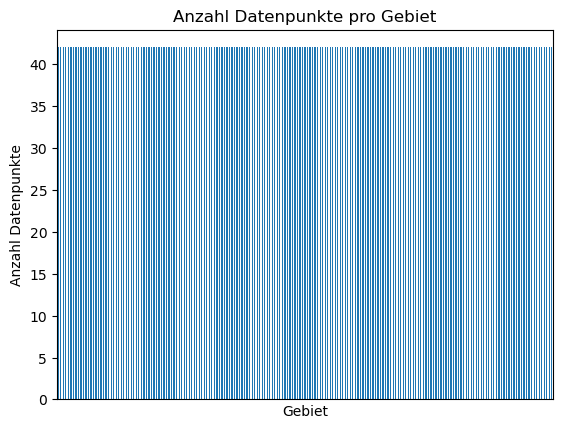

In [12]:
df_Übergewichtige['Gebiet'].value_counts().plot(kind='bar', 
                                 xticks=[],  
                                 ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Gebiet')

## **3.2 Analyse Codes**



In [13]:
print('Anzahl verschiedener Codes: ', len(df_Übergewichtige['Code'].unique()))

Anzahl verschiedener Codes:  191


In [14]:
df_Übergewichtige['Code'].value_counts()

Code
AFG    42
OMN    42
NLD    42
NZL    42
NIC    42
       ..
GEO    42
DEU    42
GHA    42
GRC    42
ZWE    42
Name: count, Length: 190, dtype: int64

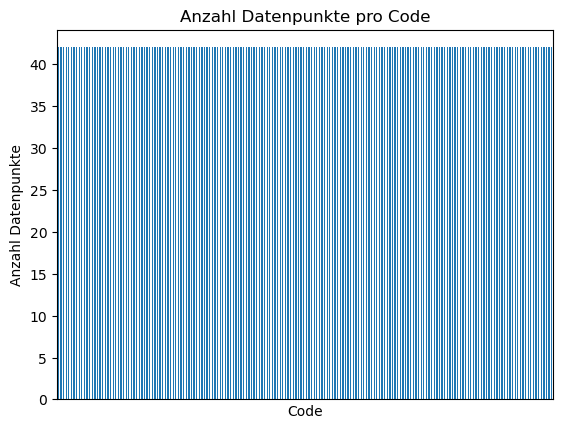

In [15]:
df_Übergewichtige['Code'].value_counts().plot(kind='bar',xticks=[], ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Code');

## **3.3 Analyse Jahr**

In [16]:
print('Anzahl verschiedener Jahre: ', len(df_Übergewichtige['Jahr'].unique()))

Anzahl verschiedener Jahre:  42


In [17]:
df_Übergewichtige['Jahr'].value_counts().sort_index()

Jahr
1975    197
1976    197
1977    197
1978    197
1979    197
1980    197
1981    197
1982    197
1983    197
1984    197
1985    197
1986    197
1987    197
1988    197
1989    197
1990    197
1991    197
1992    197
1993    197
1994    197
1995    197
1996    197
1997    197
1998    197
1999    197
2000    197
2001    197
2002    197
2003    197
2004    197
2005    197
2006    197
2007    197
2008    197
2009    197
2010    197
2011    197
2012    197
2013    197
2014    197
2015    197
2016    197
Name: count, dtype: int64

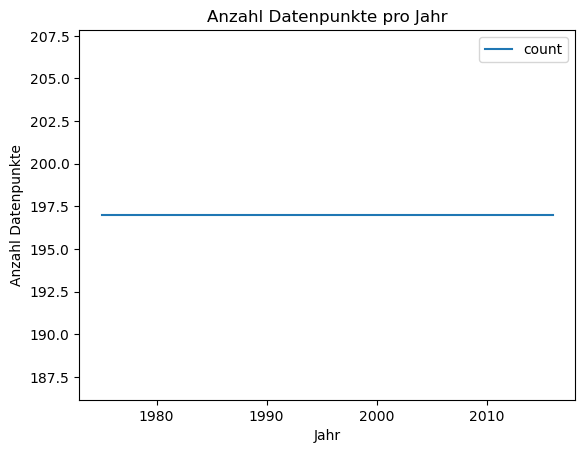

In [18]:
g = df_Übergewichtige['Jahr'].value_counts().sort_index().plot(ylabel='Anzahl Datenpunkte', title='Anzahl Datenpunkte pro Jahr');
g.legend()

## **3.4 Analyse Anteil an Übergewichtigen**

In [10]:
df_Übergewichtige.describe()

,Jahr,Anteil an Übergewichtigen
count,8274.000000,8274.000000
mean,1995.500000,37.510769
std,12.121651,17.912172
min,1975.000000,4.600000
25%,1985.000000,21.300000
50%,1995.500000,39.300000
75%,2006.000000,51.500000
max,2016.000000,88.500000


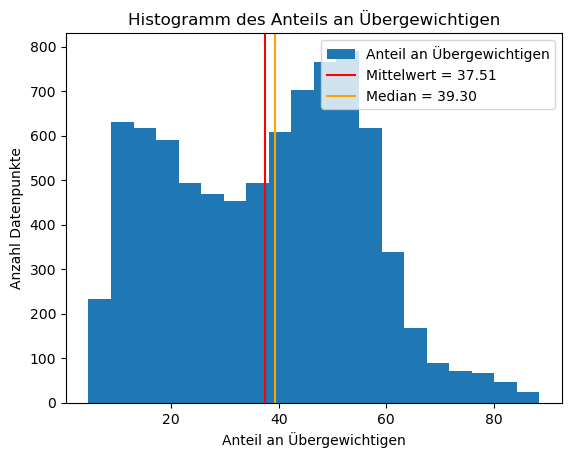

In [23]:
g = df_Übergewichtige['Anteil an Übergewichtigen'].plot(kind='hist', bins=20, title='Histogramm des Anteils an Übergewichtigen', 
                           xlabel='Anteil an Übergewichtigen', ylabel='Anzahl Datenpunkte')
mean = df_Übergewichtige['Anteil an Übergewichtigen'].mean()
g.axvline(x=df_Übergewichtige['Anteil an Übergewichtigen'].mean(), color='red',label=f'Mittelwert = {mean:.2f}')  # rote Linie bei Mittelwert

median = df_Übergewichtige['Anteil an Übergewichtigen'].median()
g.axvline(x=df_Übergewichtige['Anteil an Übergewichtigen'].median(), color='orange',label=  f'Median = {median:.2f}')  # orange Linie bei Median

g.legend()

# **4. Analyse**

### **Vorgehen**  

### **Beobachtungen**  
- Die grösste Differenz des Anteils an Übergewichtigen haben die Länder/Regionen zwischen den Jahren 1975-2016: Oman, Haiti, Dominican Republic, Costa Rica und Dominica
- Die kleinste Differenz des Anteils an Übergewichtigen haben die Länder/Regionen zwischen den Jahren 1975-2016: Singapore, Nauru, Estonia, Japan und Vietnam
- Das Land Nauru weist seit jeher einen hohen Anteil an Übergewichtigen auf, wobei die Differenz zwischen 1975 und 2016 im Vergleich zu anderen Ländern wie Oman weniger stark angestiegen ist.
- Das Maximum des Anteils an Übergewichtigen hat das Land Oman.
- Über die Jahre hinaus sieht man dass der Anteil an Übergewichtigen auf der ganzen Welt langsam immer weiter zunimmt.

- 

### **Interpretation**  
Die stetige Zunahme lässt sich erklären durch zum Beispiel das BIP. Dies sieht man klar anhand der Grafik ...

Weitere Faktoren für die Zunahme sind: veränderte Ernährungsgewohnheiten, Bewegungsmangel, sozioökonomische Veränderungen, psychologische und soziale Faktoren, genetische und biologische Faktoren, polistische und wirtschaftliche Einflüsse.

Nauru hat schon immer einen hohen Anteil an Übergewichtigen gehabt, das lässt sich vor allem auf die Genetik zurückführen. Es betseht immer noch eine Differenz des Anteils seit 1975, weil sich die Essgewohnheiten vor allem verändert haben.

### **Berechnungen**

In [64]:
diffs_1 = df_pivot_allgemein[2016]-df_pivot_allgemein[1975]   # Differenz zwischen 2016 und 1975
diffs_1 = diffs_1.sort_values().dropna()
diffs_1

Gebiet
Singapore              9.2
Nauru                 10.8
Estonia               12.3
Japan                 12.3
Vietnam               13.3
                      ... 
Dominica              33.0
Costa Rica            33.6
Dominican Republic    34.7
Haiti                 35.2
Oman                  36.3
Length: 197, dtype: float64

<Axes: title={'center': 'Grösste und Kleinste Differenzen der Übergewichtigen zwischen 1975 und 2016'}, ylabel='Gebiet'>

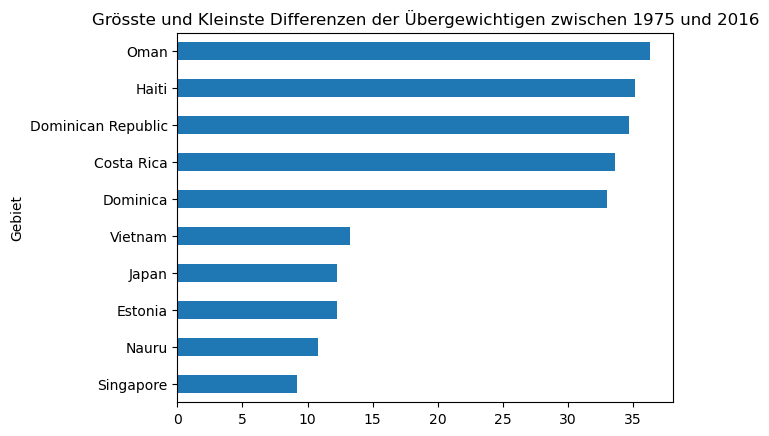

In [65]:
diffs_Übergewichtige = (diffs_1 < 13.5) | (diffs_1 > 32.9)
diffs_1[diffs_sel_Übergewichtige].plot(kind='barh', title='Grösste und Kleinste Differenzen der Übergewichtigen zwischen 1975 und 2016')

In [54]:
Gebiets_liste_Übergewichtige = diffs_1[diffs_sel_Übergewichtige].index.tolist() 
print(Gebiets_liste_Übergewichtige)

['Costa Rica', 'Dominica', 'Dominican Republic', 'Estonia', 'Haiti', 'Japan', 'Nauru', 'Oman', 'Singapore', 'Vietnam']


In [56]:
diffs_sel_extremum_Übergewichtige = (diffs_1 > 36)
Extremum_Liste_Übergewichtige = diffs_1[diffs_sel_extremum_Übergewichtige].index.tolist()
print(Extremum_Liste_Übergewichtige)

['Oman']


In [32]:
diffs_BIP = df_pivot_BIP[2016]-df_pivot_BIP[1975]   # Differenz zwischen 2016 und 1975
diffs_BIP

Gebiet
Afghanistan      857.2438
Albania         6898.2550
Algeria        10178.2720
Angola          6109.1475
Argentina       5873.6430
                  ...    
World                 NaN
Yemen           -348.5007
Yugoslavia      7561.3650
Zambia          1817.8513
Zimbabwe        -452.1699
Length: 178, dtype: float64

In [33]:
diff_oman = diffs_BIP.loc["Oman"]
print(diff_oman)

44580.734


In [76]:
diffs_sel_extremum_BIP = (diffs_BIP == 44580.734)
extremum_liste_BIP = diffs_BIP [diffs_sel_extremum_BIP].index.tolist()
print(extremum_liste_BIP)

['Oman']


### **Visualisierung**

**Erklärung: Differenzen der Gebiete**

Die nachstehende Grafik illustriert die fünf Gebiete mit der größten sowie der geringsten Veränderung im Anteil an Übergewichtigen zwischen den Jahren 1975 und 2016.

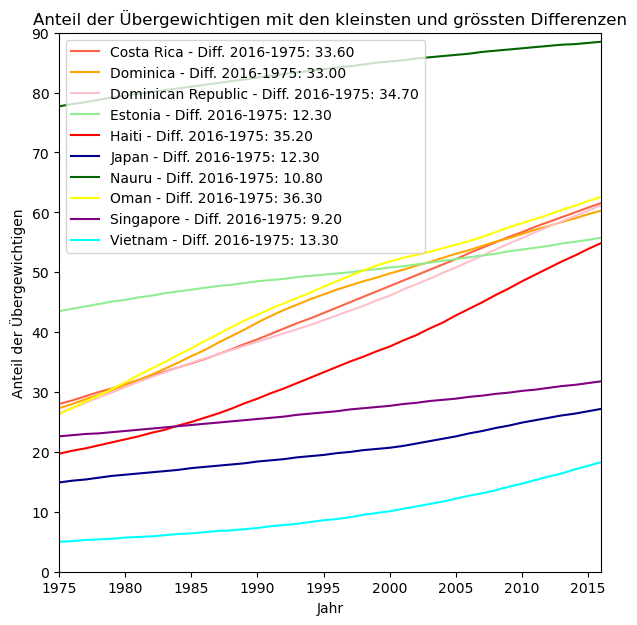

In [58]:
color_dict = {
    'Singapore': 'purple',
    'Oman': 'yellow',
    'Haiti': 'red',
    'Dominican Republic': 'pink',
    'Costa Rica': 'tomato',
    'Dominica': 'orange',
    'Vietnam': 'cyan',
    'Japan': 'darkblue',
    'Estonia': 'lightgreen',
    'Nauru' : 'darkgreen'
}

for gebiet in Gebiets_liste_Übergewichtige:
    diff = diffs_1[gebiet]
    g = df_pivot_allgemein.loc[gebiet].plot(title='Anteil der Übergewichtigen mit den kleinsten und grössten Differenzen', xlabel='Jahr', ylabel=f'Anteil der Übergewichtigen', legend=True,
                                  label=f'{gebiet} - Diff. 2016-1975: {diff:.2f}', # für die Legende
                                  xlim=[1975,2016], ylim=[0,90],   # x- und y-Achsen begrenzen
                                  color=color_dict[gebiet],        # Farbe aus color_dict
                                  figsize=(7,7))                   # Grösse des Plots




**Erklärung:**

Um zu schauen ob das BIP einen Einfluss auf das Übergewicht hat, vergleichen wir das Land welches den höchtsen Anteil an Übergewichtigen hat. Dies ist der Oman.

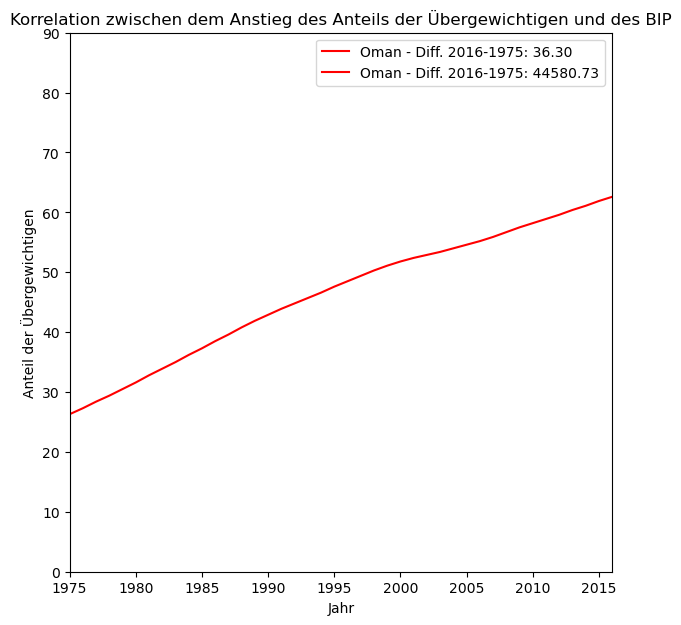

In [79]:
color_dict = {
    'Oman': 'red',
}

for gebiet in Extremum_Liste_Übergewichtige:
    diff = diffs_1[gebiet]
    g = df_pivot_allgemein.loc[gebiet].plot(title='Korrelation zwischen dem Anstieg des Anteils der Übergewichtigen und des BIP', xlabel='Jahr', ylabel=f'Anteil der Übergewichtigen', legend=True,
                                  label=f'{gebiet} - Diff. 2016-1975: {diff:.2f}', # für die Legende
                                  xlim=[1975,2016], ylim=[0,90],   # x- und y-Achsen begrenzen
                                  color=color_dict[gebiet],        # Farbe aus color_dict
                                  figsize=(7,7))                   # Grösse des Plots

for gebiet in extremum_liste_BIP:
    diff = diffs_BIP[gebiet]
    f = df_pivot_BIP.loc[gebiet].plot(title='Korrelation zwischen dem Anstieg des Anteils der Übergewichtigen und des BIP', xlabel='Jahr', ylabel=f'Anteil der Übergewichtigen', legend=True,
                                  label=f'{gebiet} - Diff. 2016-1975: {diff:.2f}', # für die Legende
                                  xlim=[1975,2016], ylim=[0,90],   # x- und y-Achsen begrenzen
                                  color=color_dict[gebiet],        # Farbe aus color_dict
                                  figsize=(7,7))                   # Grösse des Plots


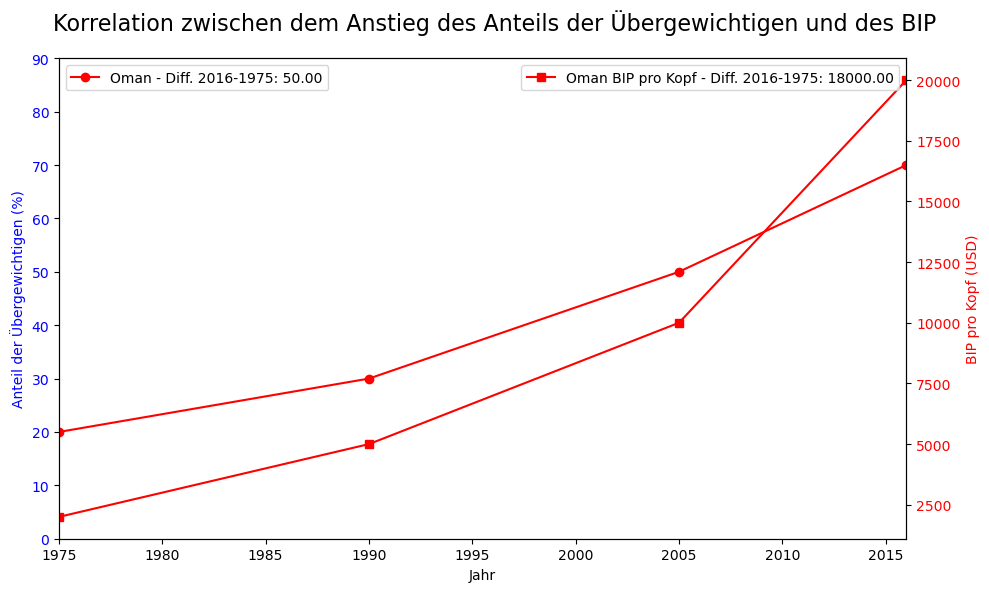

In [82]:
import matplotlib.pyplot as plt
import pandas as pd

# Beispiel-Daten (ersetze dies mit den tatsächlichen Daten)
# Angenommene Datenstruktur für df_pivot_allgemein und df_pivot_BIP
# Hier beispielhafte Dummy-Daten, ersetze sie mit deinen eigenen DataFrames
df_pivot_allgemein = pd.DataFrame({
    'Jahr': [1975, 1990, 2005, 2016],
    'Oman': [20, 30, 50, 70]
})
df_pivot_BIP = pd.DataFrame({
    'Jahr': [1975, 1990, 2005, 2016],
    'Oman': [2000, 5000, 10000, 20000]
})

color_dict = {
    'Oman': 'red',
}

# Beispiel für diffs_1 und diffs_BIP, ersetze dies mit den tatsächlichen Werten
diffs_1 = {'Oman': 50}
diffs_BIP = {'Oman': 18000}

# Erstelle die Figur und die Achsen
fig, ax1 = plt.subplots(figsize=(10, 6))

# Erste Y-Achse für Übergewicht (linke Achse)
for gebiet in ['Oman']:  # Beispiel mit nur 'Oman', kannst auch eine Liste verwenden
    diff = diffs_1[gebiet]
    ax1.plot(df_pivot_allgemein['Jahr'], df_pivot_allgemein[gebiet], 
             label=f'{gebiet} - Diff. 2016-1975: {diff:.2f}', 
             color=color_dict[gebiet], marker='o')
    ax1.set_xlabel('Jahr')
    ax1.set_ylabel('Anteil der Übergewichtigen (%)', color='blue')
    ax1.tick_params(axis='y', labelcolor='blue')
    ax1.set_xlim([1975, 2016])
    ax1.set_ylim([0, 90])

# Zweite Y-Achse für BIP pro Kopf (rechte Achse)
ax2 = ax1.twinx()  # Erstellt die zweite Y-Achse
for gebiet in ['Oman']:  # Beispiel mit nur 'Oman', kannst auch eine Liste verwenden
    diff = diffs_BIP[gebiet]
    ax2.plot(df_pivot_BIP['Jahr'], df_pivot_BIP[gebiet], 
             label=f'{gebiet} BIP pro Kopf - Diff. 2016-1975: {diff:.2f}', 
             color=color_dict[gebiet], marker='s')
    ax2.set_ylabel('BIP pro Kopf (USD)', color='red')
    ax2.tick_params(axis='y', labelcolor='red')

# Titel und Legenden
fig.suptitle('Korrelation zwischen dem Anstieg des Anteils der Übergewichtigen und des BIP', fontsize=16)

# Legenden hinzufügen
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Layout anpassen und Grafik anzeigen
fig.tight_layout()
plt.show()


TypeError: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind=['Oman'])` instead of `Series.plot(['Oman'],)`.

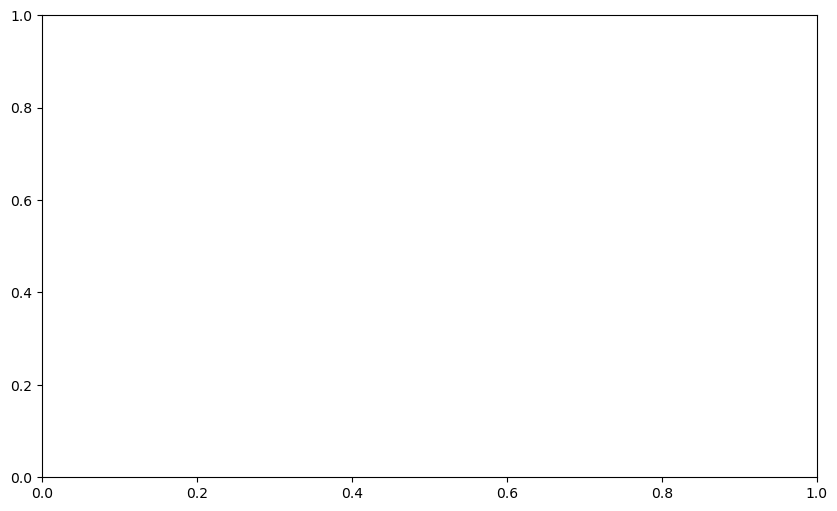

In [81]:

# Gebiet definieren (für Titel und Annotation)
gebiet = "Oman"  # Ändere dies zu "Nauru", um Nauru zu analysieren

# Hauptplot (erste Y-Achse)
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot für die linke Y-Achse (Übergewicht)
for gebiet in Extremum_Liste_Übergewichtige:
    diff = diffs_1[gebiet]
g = df_pivot_allgemein.loc[gebiet].plot(Extremum_Liste_Übergewichtige, color='blue', marker='o', label=f'{gebiet} Übergewicht (%)')
ax1.set_xlabel('Jahr')
ax1.set_ylabel('Übergewicht (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# xlim für die x-Achse anwenden
ax1.set_xlim([1975, 2016])

# Zweite Y-Achse (BIP pro Kopf)
ax2 = ax1.twinx()
ax2.plot(diff_oman, color='red', marker='s', label=f'{gebiet} BIP pro Kopf (USD)')
ax2.set_ylabel('BIP pro Kopf (USD)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Titel und Annotation
fig.suptitle(f'Übergewicht und BIP pro Kopf in {gebiet}', fontsize=16)
fig.tight_layout()

# Legenden hinzufügen
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Grafik anzeigen
plt.show()

